## Start

In [3]:
import matplotlib.pyplot as plt
import numpy as np

<Figure size 432x288 with 0 Axes>

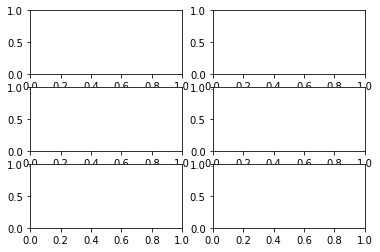

In [22]:
fig = plt.figure()
fig.suptitle("No axes on this figure")

fig, ax_1st = plt.subplots(3, 2)

differences 
- *matplotlib* is the whole package
- *matplotlib.plot* is a module <small>(of the matplotlib)</small>
- *pylab* is a module <u>gets installed alongside *matplotlib*</u>
    
about *pylab*
- It equals ```import matplotlib.pyplot``` and ```numpy```
- BUT, **it is no longer recommended**.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

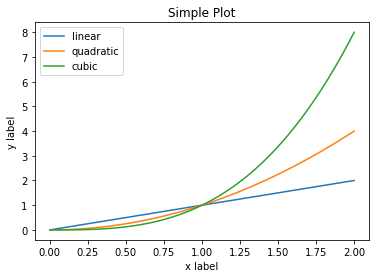

In [19]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('Simple Plot')
plt.legend()

plt.show()

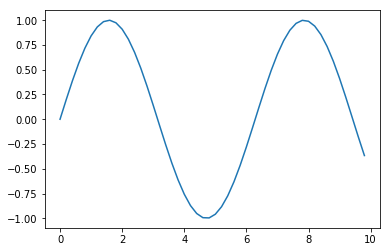

In [29]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(x, y)

plt.show()

## Fold it as a function

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax  : Axes
        The axes to draw to

    data1 : array
        The x data

    data2 : array
        The y data

    param_dict : dict
        Dictionary of kwargs to pass to ax.plot

    Returns
    ----------
    out  : list
        List of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

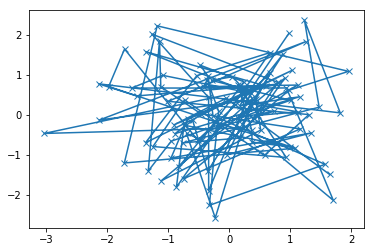

In [5]:
data1,data2,data3,data4 = np.random.randn(4,100)

fig,ax = plt.subplots(1,1)
my_plotter(ax,data1,data2,{'marker':'x'})

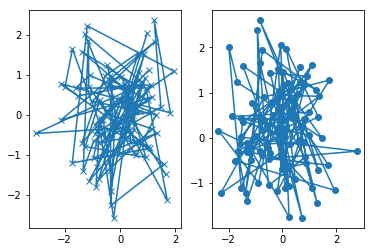

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
my_plotter(ax1,data1,data2,{'marker':'x'})
my_plotter(ax2,data3,data4,{'marker':'o'})

## lalala

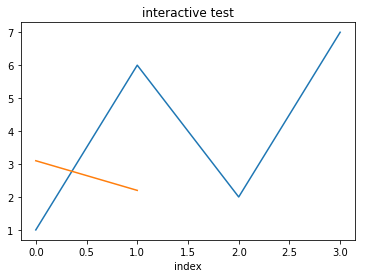

In [19]:
import matplotlib.pyplot as plt

plt.plot([1,6,2,7])

plt.title('interactive test')
plt.xlabel('index')

ax = plt.gca()
ax.plot([3.1,2.2])

plt.draw()

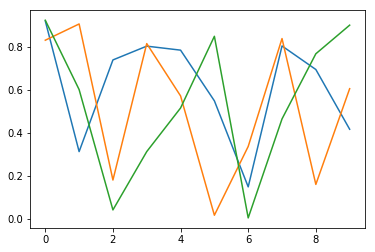

In [18]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(3):
    plt.plot(np.random.rand(10))

## Performance #1

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


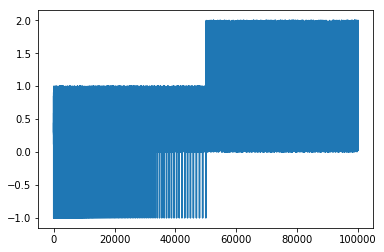

In [26]:
%time

# higher thresholds result in quicker rendering

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.25 µs


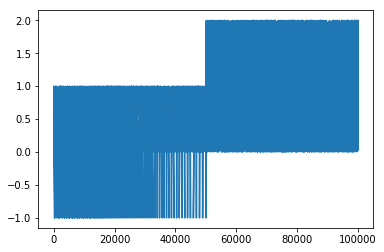

In [27]:
%time

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

## Perfomance #2

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


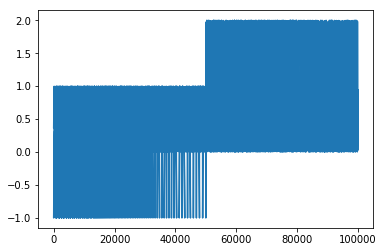

In [33]:
%time 

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


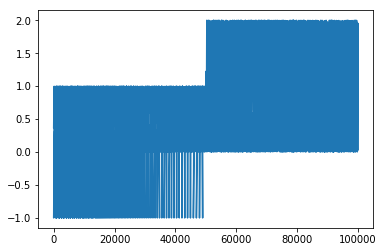

In [32]:
%time

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()